In [1]:
import sys
sys.path.insert(0, '../')
from gw_tools.gw_plot import gw_plot
from gw_tools import data_prep

import pandas as pd

pred_AEK201 = pd.read_pickle('../data/prediction_pickles/model_predictions_AEK201.pkl')
pred_AFL259 = pd.read_pickle('../data/prediction_pickles/model_predictions_AFL259.pkl')
pred_APK309 = pd.read_pickle('../data/prediction_pickles/model_predictions_APK309.pkl')
pred_APK310 = pd.read_pickle('../data/prediction_pickles/model_predictions_APK310.pkl')

future_AEK201 = pd.read_pickle('../data/prediction_pickles/future_data_compare_AEK201.pkl')
future_AFL259 = pd.read_pickle('../data/prediction_pickles/future_data_compare_AFL259.pkl')
future_APK309 = pd.read_pickle('../data/prediction_pickles/future_data_compare_APK309.pkl')
future_APK310 = pd.read_pickle('../data/prediction_pickles/future_data_compare_APK310.pkl')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="whitegrid", palette="mako")

In [3]:
def gw_line_plot(pred_df=pred_AEK201, well='AEK201', 
                 model='pred_lin_reg', 
                 train_limit=365, future_limit=0,
                 future_data = None,
                 pred_smoothing = 7,
                 scatter_pred = False,
                 line_pred = True,
                 save_file=None):
    ''' Make a line plot of the predictions made by our models

        Parameters
        ----------
    
    '''
    model_dict = {'pred_baseline':'Baseline', 
                  'pred_lin_reg':'Linear Reg', 
                  'pred_cnn':'CNN', 
                  'pred_lstm':'LSTM'}
    
    df_train = pred_df.dropna()[:-365].copy()
    df_test = pred_df.dropna()[-365:].copy()
    df_future = pred_df.loc[pred_df.date > data_prep.get_end_date(well)].copy()

    # get the size in inches
    dpi = 200.
    if future_data is None:
        xpixels = 800
        ypixels = 400
    else:
        xpixels = 1200
        ypixels = 600
    xinch = xpixels / dpi
    yinch = ypixels / dpi
        
    plt.figure(figsize=(xinch,yinch), dpi=dpi)

    X_train = df_train.date[-train_limit:]
    y_train = df_train.Actual[-train_limit:]
    
    X_test = df_test.date
    y_test = df_test.Actual
    
    y_pred_test = df_test[model_dict[model]]
    y_pred_test_smooth = df_test[model_dict[model]].rolling(pred_smoothing).mean()
    
    X_future = df_future.date
    y_future = df_future[model_dict[model]]
    y_future_smooth = df_future[model_dict[model]].rolling(pred_smoothing).mean()

    ## Plot the training data
    if train_limit > 0:
        X_train = df_train.date[-train_limit:]
        y_train = df_train.Actual[-train_limit:]
        plt.plot(X_train, 
                 y_train, 
                 c='black', 
                 label='Actual (Training)')
    elif train_limit is None:
        X_train = df_train.date[-train_limit:]
        y_train = df_train.Actual[-train_limit:]
        plt.plot(X_train, 
                 y_train, 
                 c='black', 
                 label='Actual (Training)')
    ## Plot the test data
    plt.plot(X_test, 
             y_test, 
             c='#5DCAE9', 
             label='Actual (Test)')

    ## Plot the model predictions on the test set
    if scatter_pred:
        plt.scatter(X_test, 
                    y_pred_test, 
                    marker='x', linewidths=.2, c='#FF9425')
    if line_pred:
        if pred_smoothing == 0:
            plt.plot(X_test, 
                     y_pred_test, 
                     c='#FF9425', linestyle='--', 
                     label='Prediction (Test)')
        else:
            plt.plot(X_test, 
                     y_pred_test_smooth, 
                     c='#FF9425', linestyle='--', 
                     label='Prediction (Test)')
            
    ## Plot the model predictions beyond the test set
    if future_limit is None:
        if future_data is not None:
            future_data_dates = future_data['date'].copy()
            future_data_values = future_data['actual_depth'].copy()
            plt.scatter(future_data_dates, future_data_values, 
                        marker='o', linewidths=1, c='blue', 
                        label = 'Actual (Sparse)')
        if pred_smoothing == 0:
            plt.plot(X_future, 
                     y_future, 
                     c='#FF9425', linestyle=':', 
                     label='Prediction (Sparse)')
        else:
            plt.plot(X_future, 
                     y_future_smooth, 
                     c='#FF9425', linestyle=':', 
                     label='Prediction (Sparse)')
    elif future_limit > 0:
        if pred_smoothing == 0:
            plt.plot(X_future[:-future_limit], 
                     y_future[:-future_limit], 
                     c='#FF9425', linestyle=':', 
                     label='Prediction (Sparse)')
        else:    
            plt.plot(X_future[:-future_limit], 
                     y_future_smooth[:-future_limit], 
                     c='#FF9425', linestyle=':', 
                     label='Prediction (Sparse)')

    ## Prepare the labels and legend
    plt.title('Water Depth Relative to the Surface\n'+model_dict[model]+' ('+well+')', fontsize=8)
    plt.xlabel('Date', fontsize=8)
    plt.xticks(fontsize=6)
    plt.ylabel('Feet from the Surface', fontsize=8)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=5)
    #plt.xlabel('Date')
    #plt.ylabel('Feet from the Surface')
    #plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
    plt.tight_layout()
    
    ## Save the plot
    if save_file is not None:
        plt.savefig('../models/graphs/'+save_file)

    ## Show the plot
    plt.show()

    

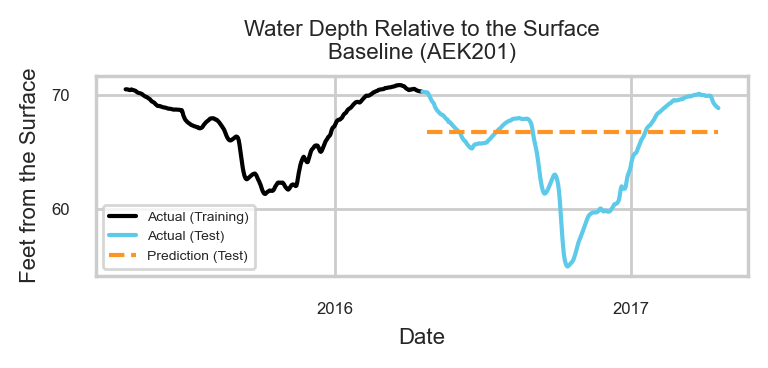

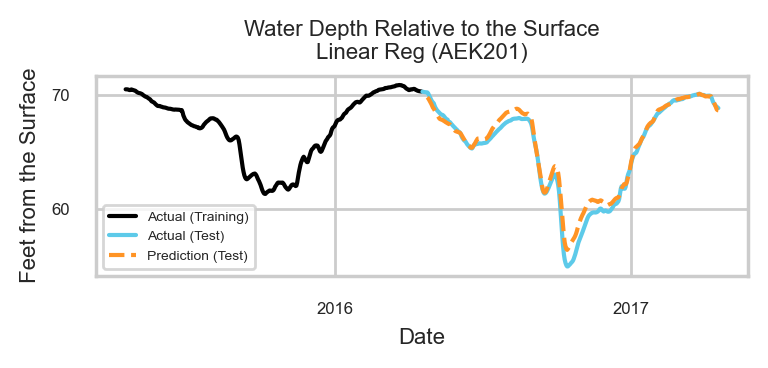

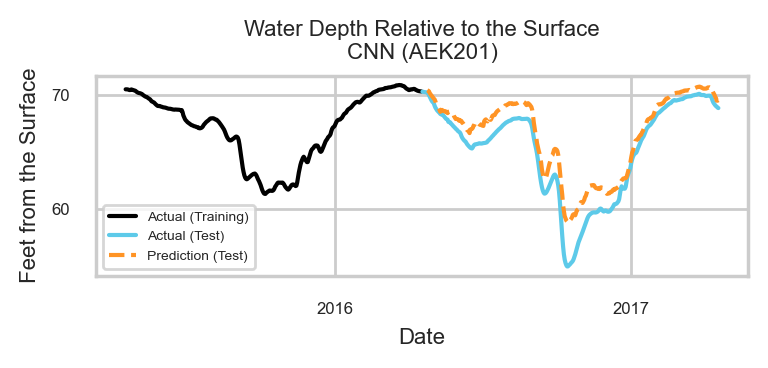

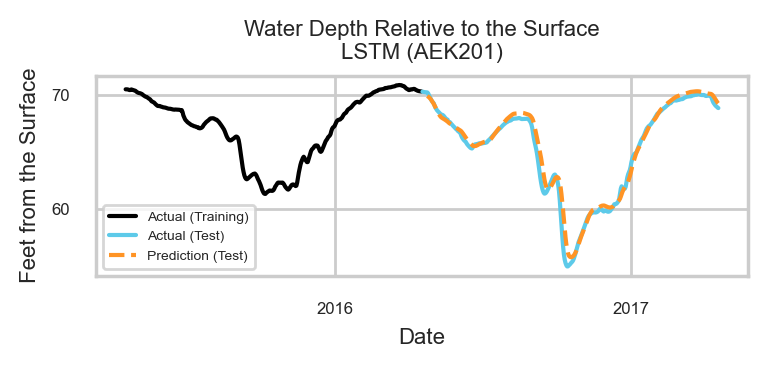

In [4]:
gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_baseline', save_file='AEK201_baseline.png')
gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_lin_reg')
gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_cnn')
gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_lstm')

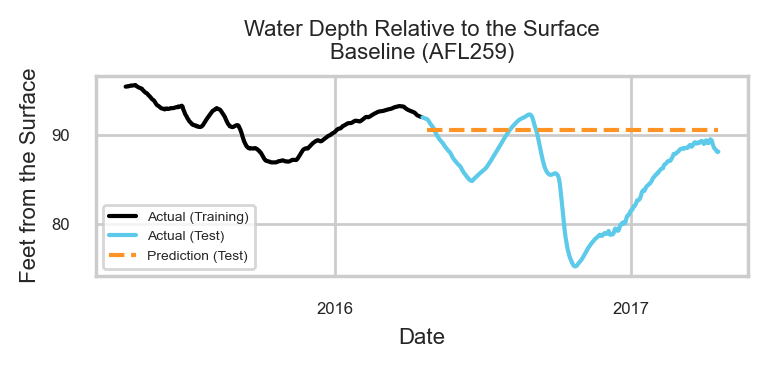

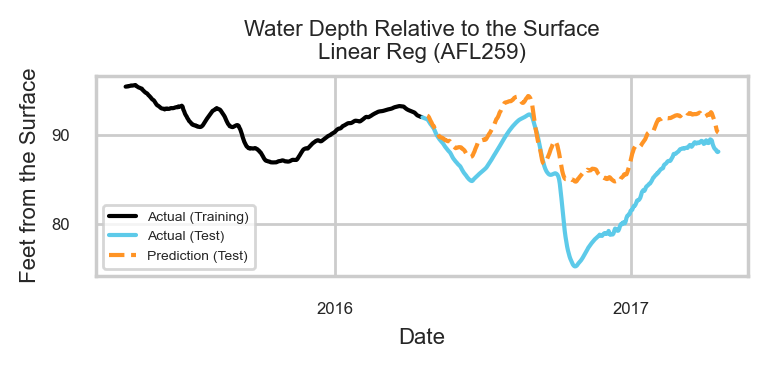

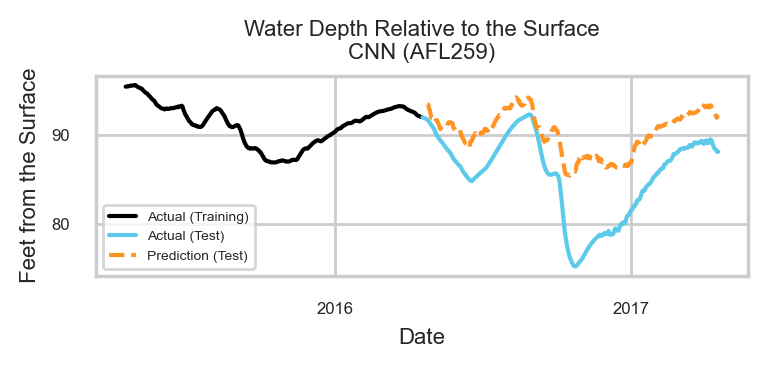

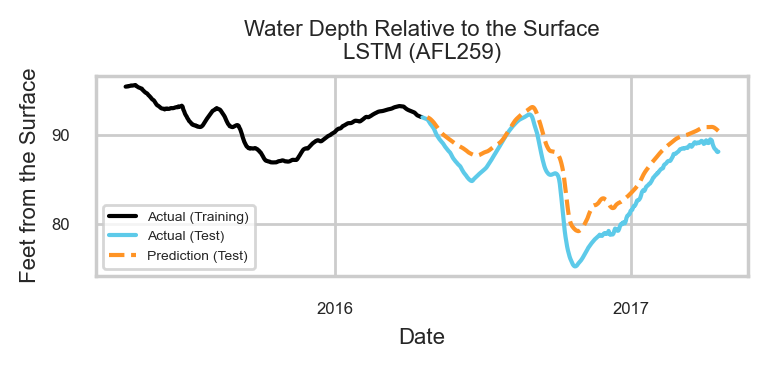

In [5]:
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_baseline')
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_lin_reg')
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_cnn')
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_lstm')

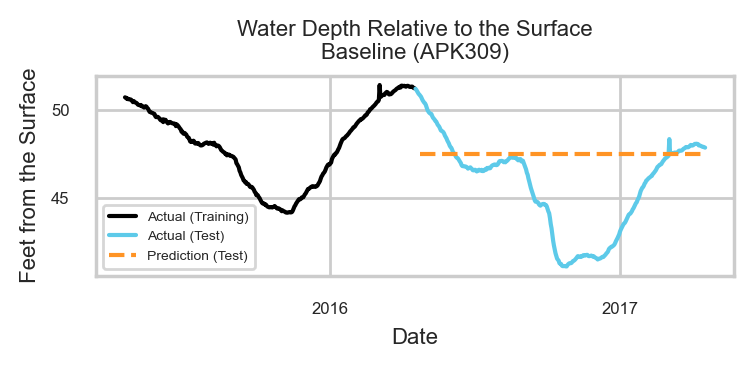

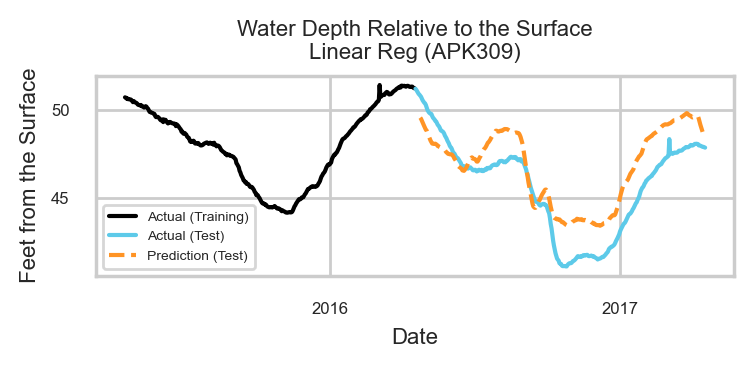

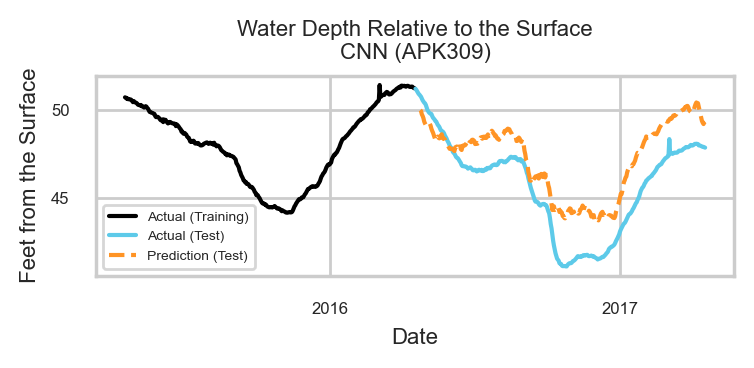

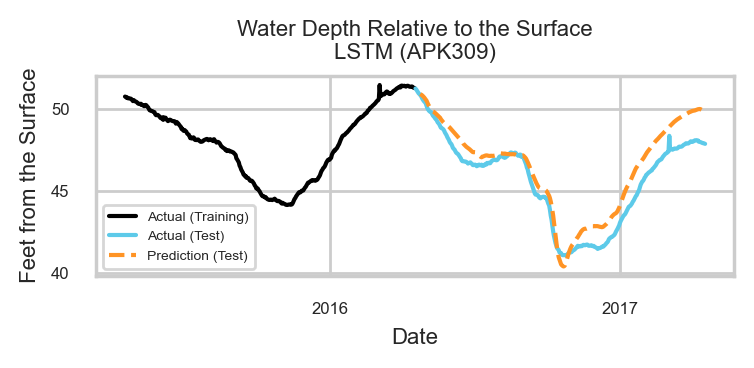

In [6]:
gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_baseline', save_file='APK309_baseline.png')
gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_lin_reg', save_file='APK309_lin_reg.png')
gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_cnn', save_file='APK309_cnn.png')
gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_lstm', save_file='APK309_lstm.png')

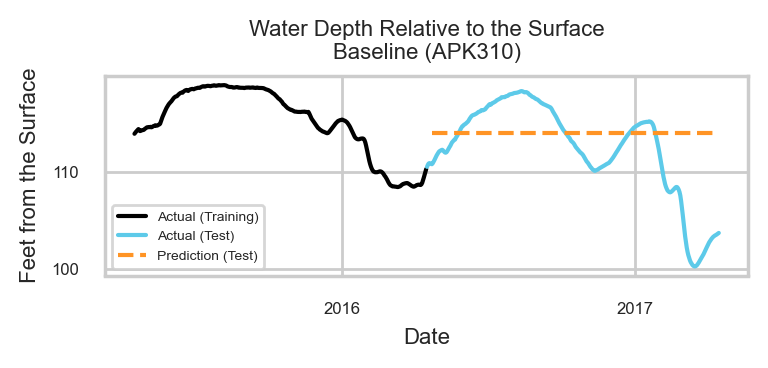

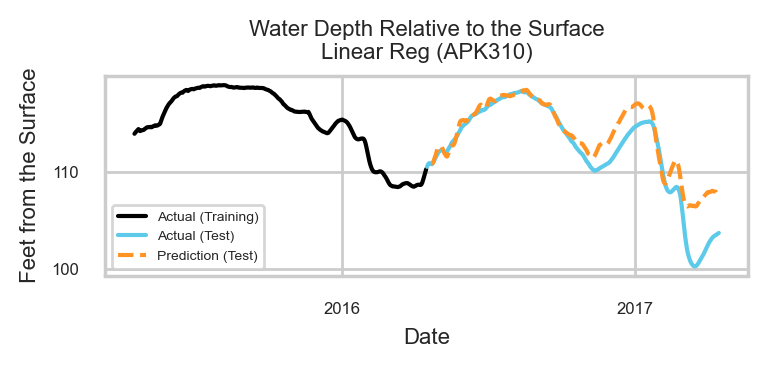

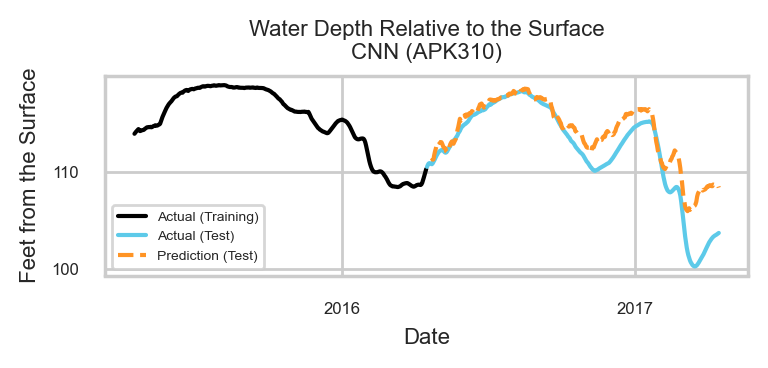

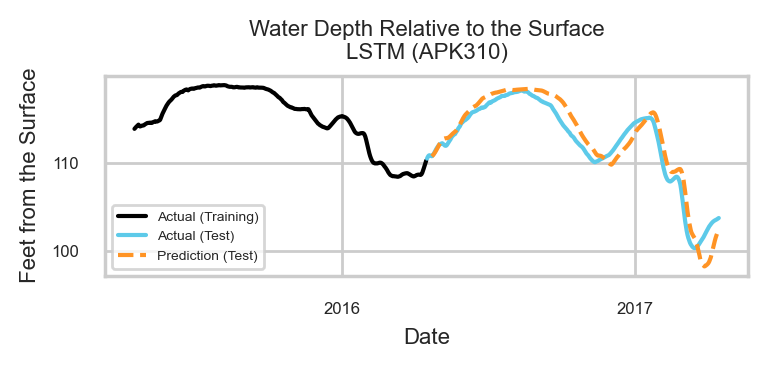

In [7]:
gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_baseline')
gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_lin_reg')
gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_cnn')
gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_lstm')

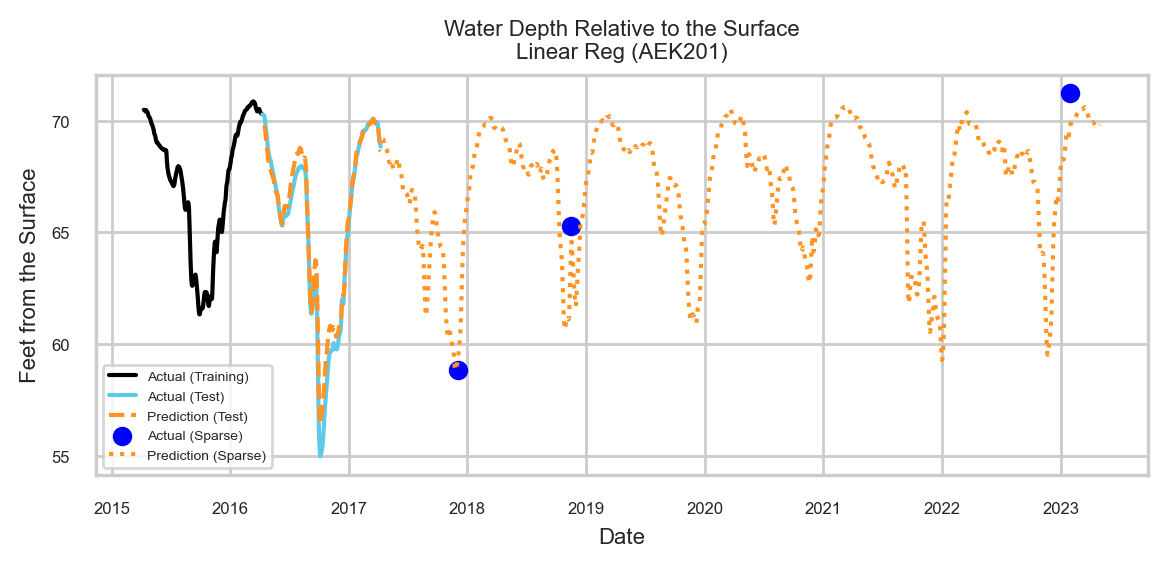

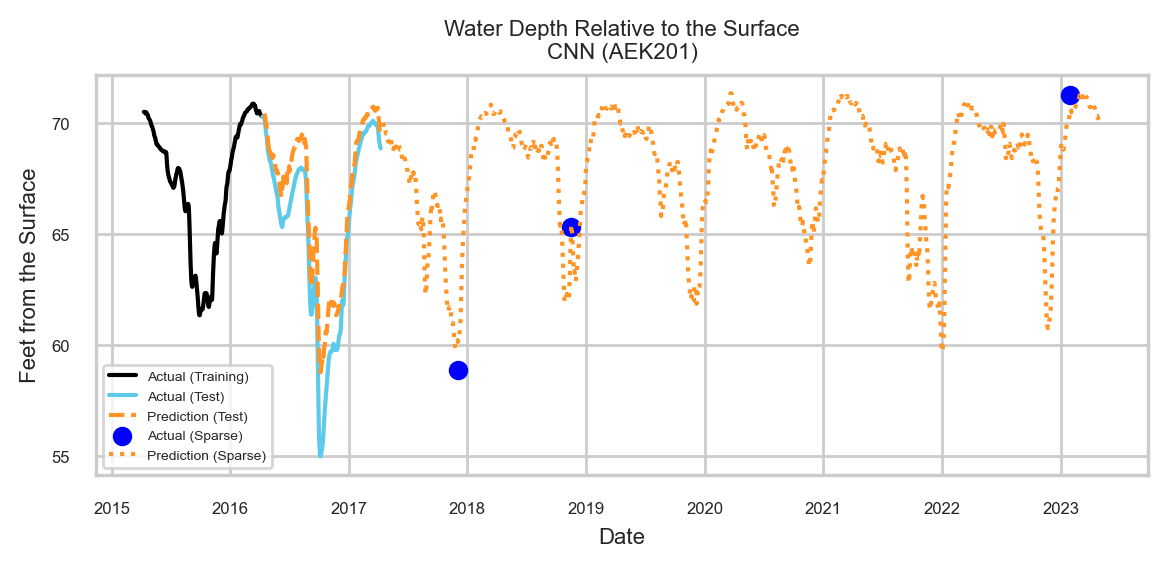

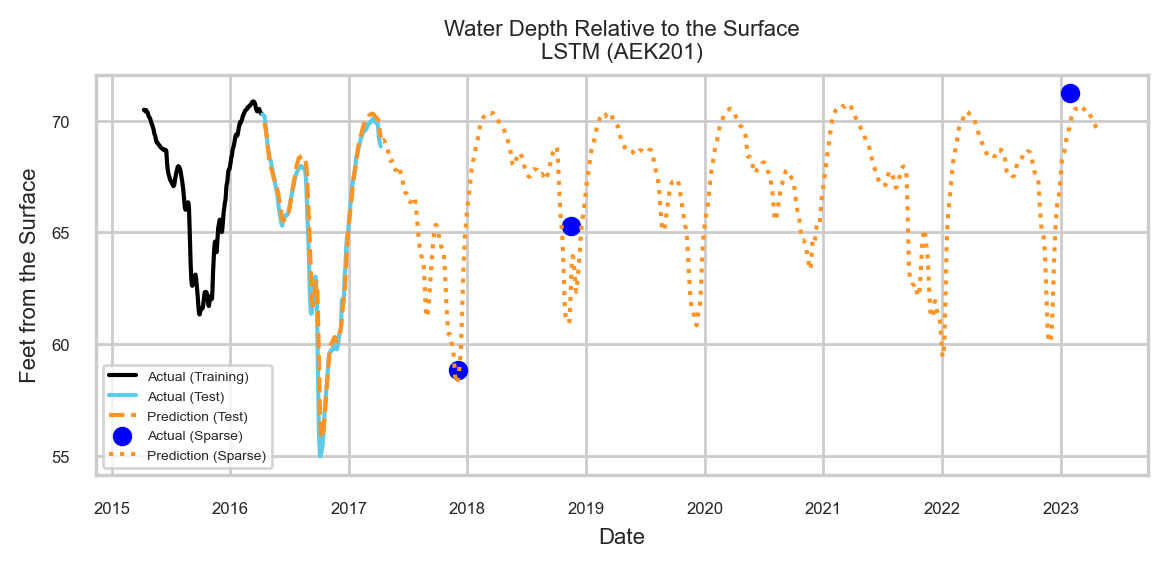

In [8]:
gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_lin_reg', 
             future_limit=None, future_data=future_AEK201)

gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_cnn', 
             future_limit=None, future_data=future_AEK201)

gw_line_plot(pred_df = pred_AEK201, well='AEK201', model='pred_lstm', 
             future_limit=None, future_data=future_AEK201)

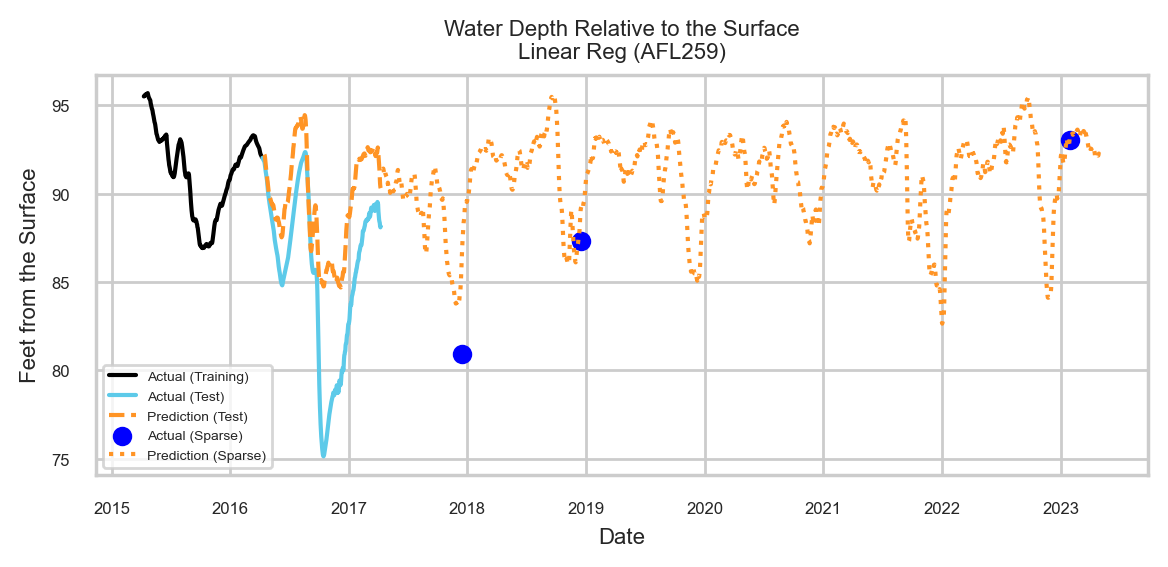

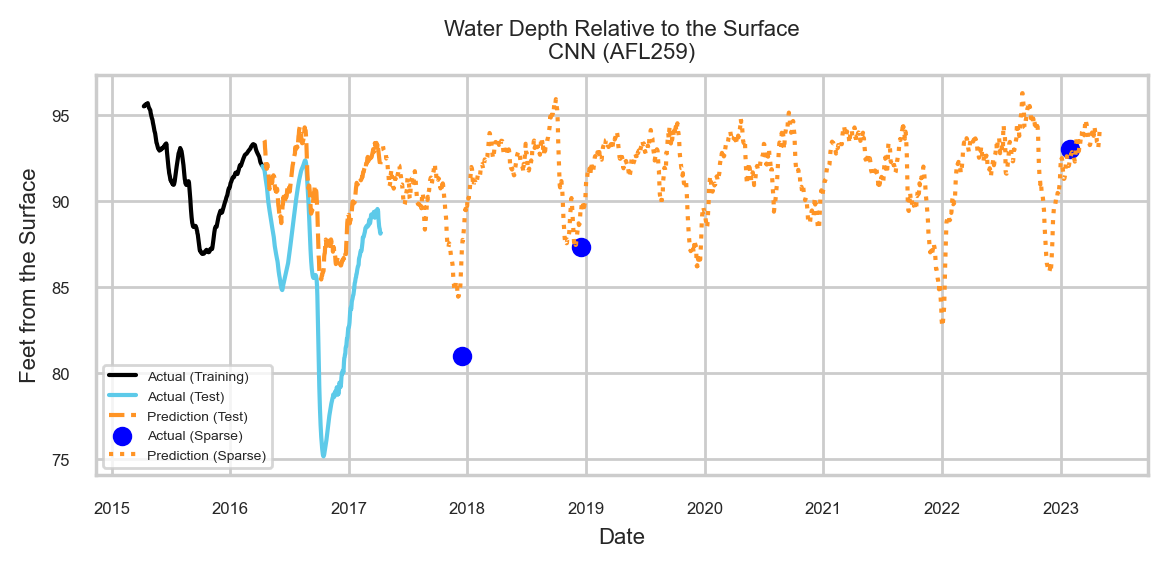

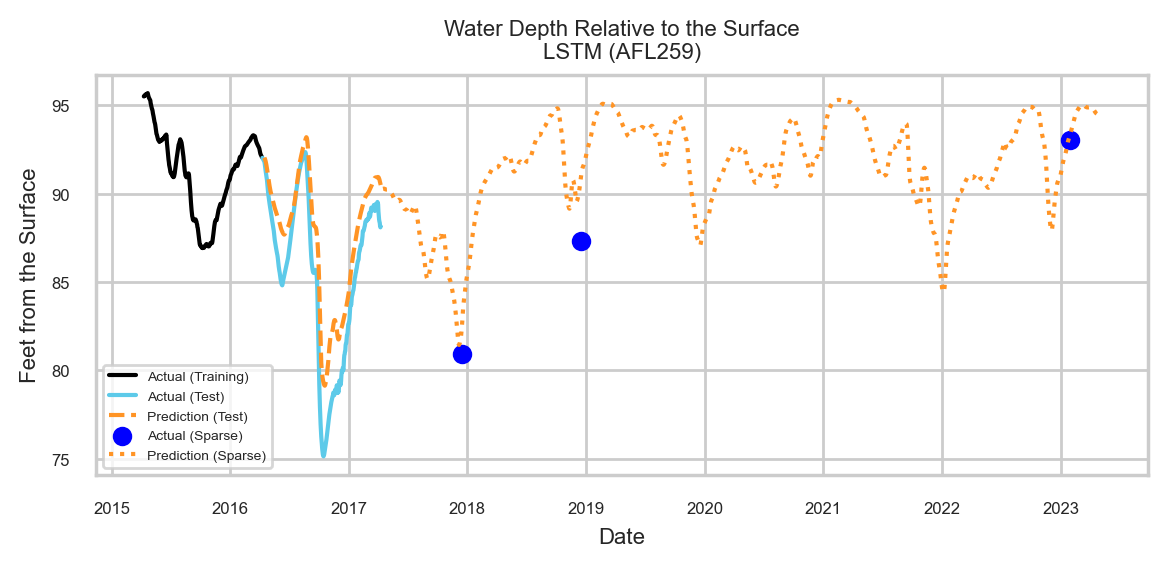

In [9]:
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_lin_reg', future_limit=None, future_data=future_AFL259)
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_cnn', future_limit=None, future_data=future_AFL259)
gw_line_plot(pred_df = pred_AFL259, well='AFL259', model='pred_lstm', future_limit=None, future_data=future_AFL259)

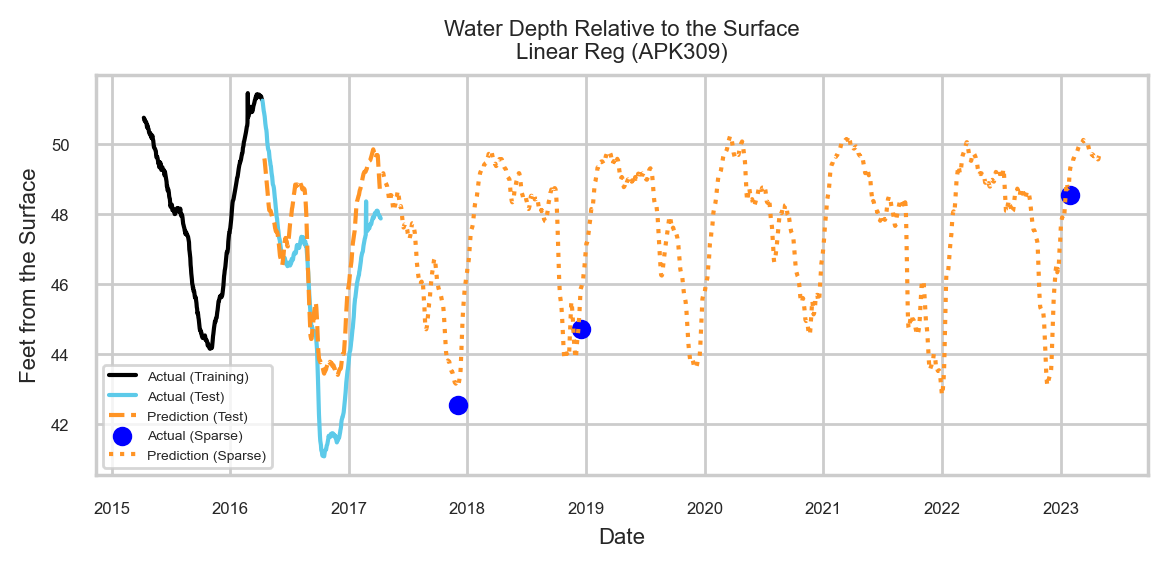

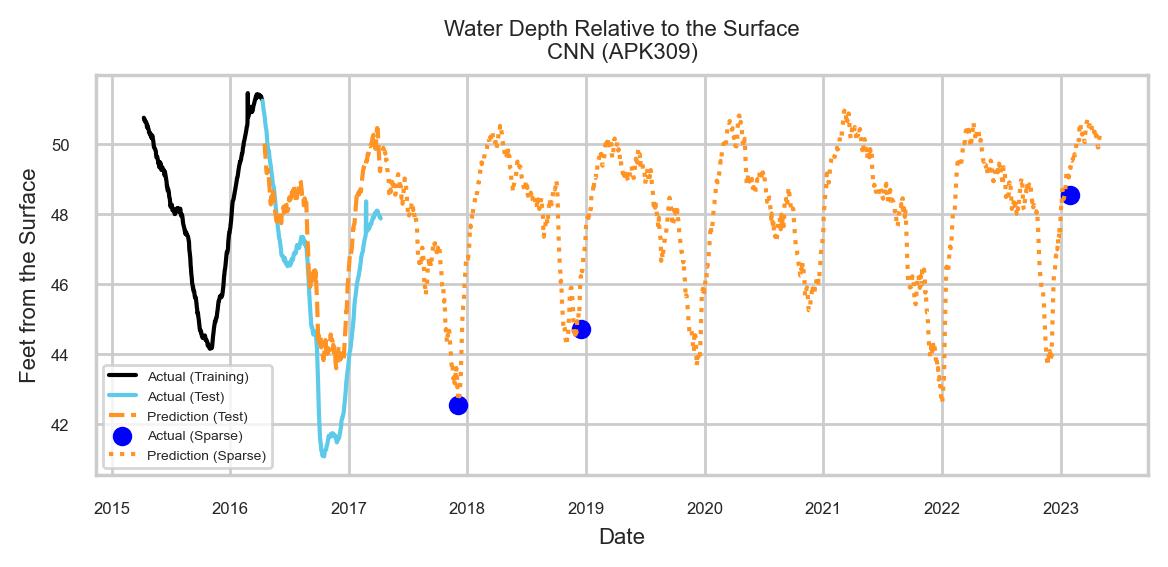

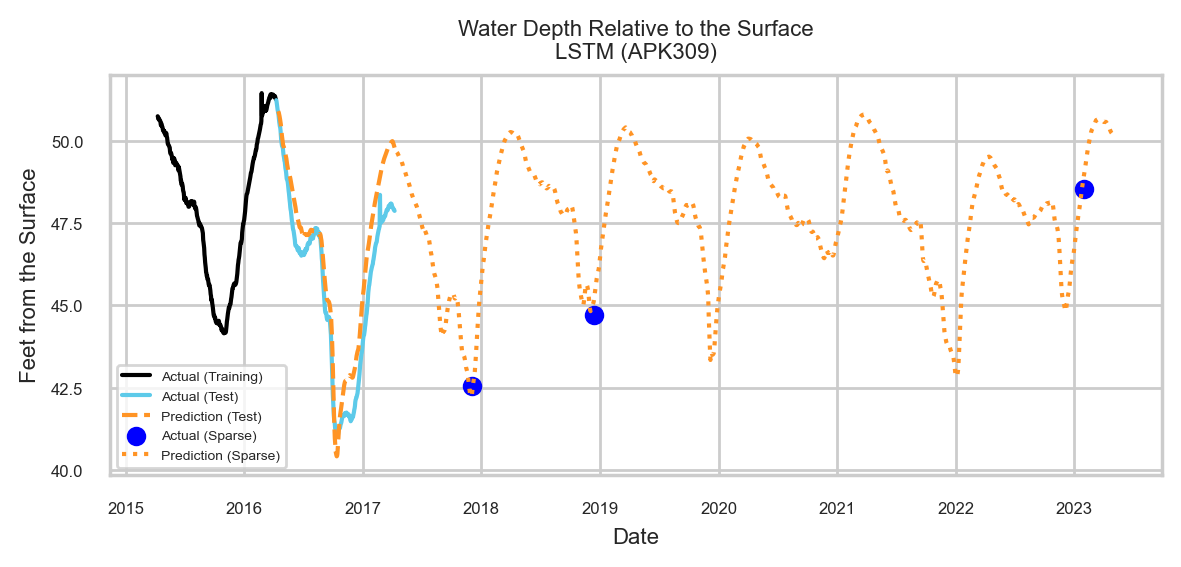

In [10]:
gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_lin_reg', 
             future_limit=None, future_data=future_APK309)

gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_cnn', 
             future_limit=None, future_data=future_APK309, 
             save_file='APK309_future_cnn.png')

gw_line_plot(pred_df = pred_APK309, well='APK309', model='pred_lstm', 
             future_limit=None, future_data=future_APK309, 
             save_file='APK309_future_lstm.png')

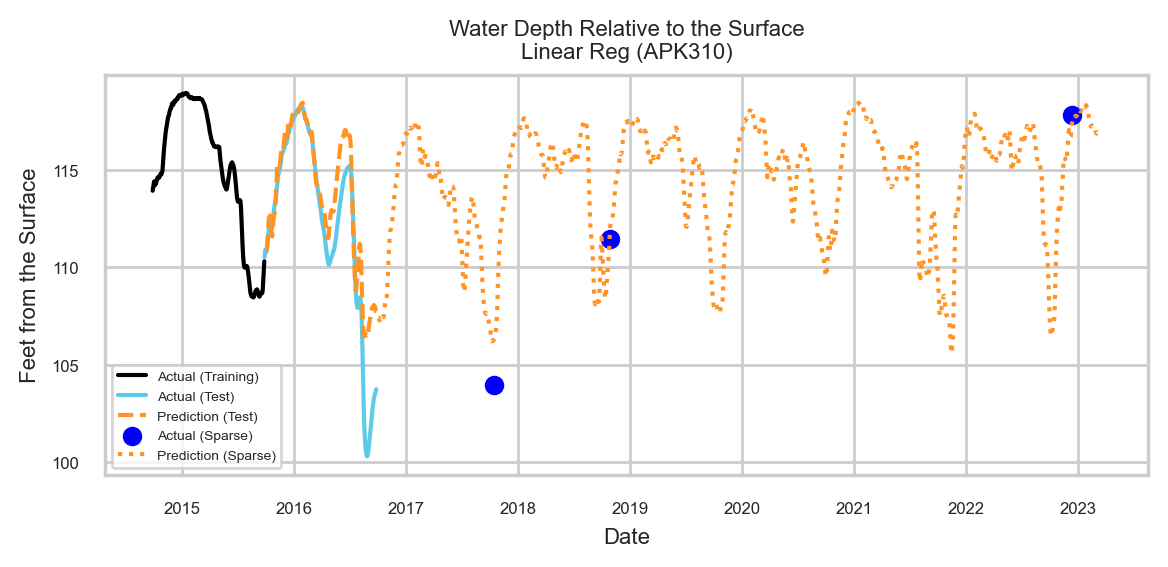

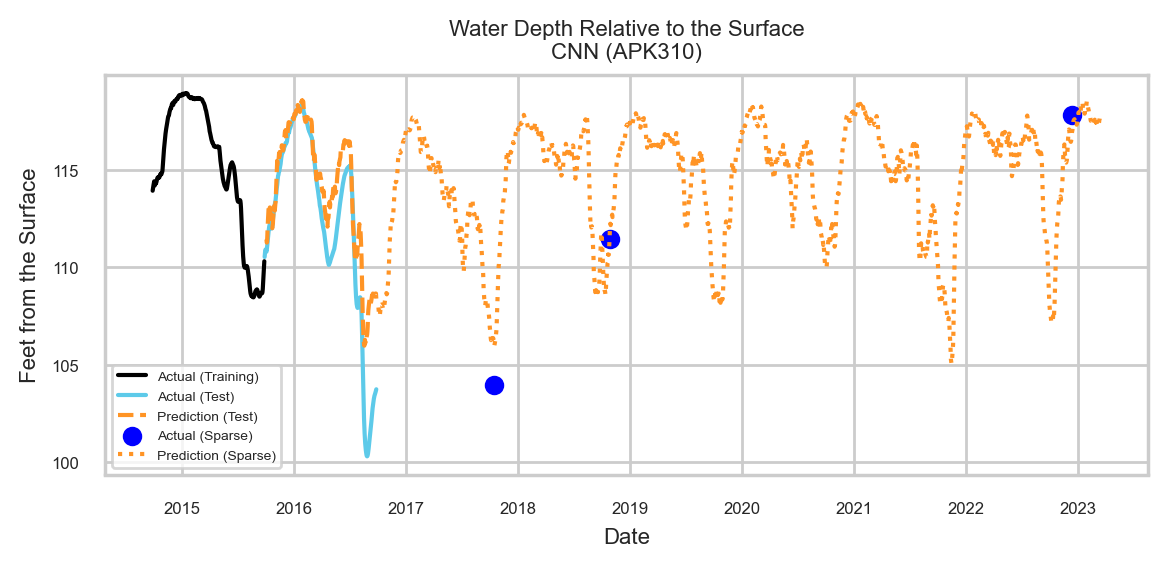

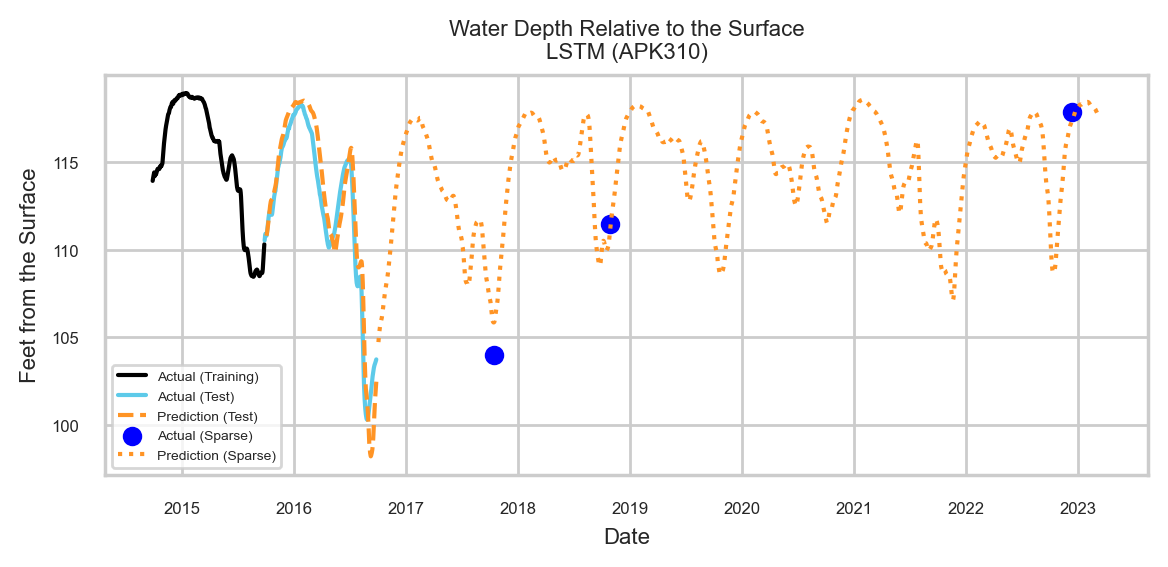

In [11]:
gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_lin_reg', 
             future_limit=None, future_data=future_APK310)

gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_cnn', 
             future_limit=None, future_data=future_APK310)

gw_line_plot(pred_df = pred_APK310, well='APK310', model='pred_lstm', 
             future_limit=None, future_data=future_APK310)

In [12]:
future_AEK201

,date,Baseline,Linear Reg,CNN,LSTM,actual_depth
32,2018-05-24,66.751442,59.902764,60.444824,58.796631,58.86
33,2019-05-08,66.751442,63.917185,64.417786,64.201172,65.29
34,2023-07-20,66.751442,69.840068,70.459641,70.055367,71.23
